# Fig16. Geographical distribution of funding across the 17 Spanish regions, divided according to the three phases identified above. 

#### Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl


plt.style.use('seaborn-muted')


def read_csv(path):
    """
    :param path: of desir the xlsx file
    :return: String that contains all project descriptions
    """
    df = pd.read_csv(path)
    filtered_df = df.replace(np.nan, 0, regex=True)
    
    
    return filtered_df

#### Define projects data path

In [2]:
file_path = "data/mapeo_proyectos.csv"

#### Define function to clean projects data

In [3]:
def prepare_data(data):
    data = read_csv(file_path)
    data["Financiación"] = pd.to_numeric(data["Financiación"], errors='coerce')
    data = data[data["CCAA"] != 0]
    data = data[data["Financiación"] != 0]
    mini = data[["ID proyecto","Financiación", "Temporalización (inicio)", "CCAA"]] 
    mini = mini.groupby(['ID proyecto','Temporalización (inicio)', 'CCAA'])["Financiación"].apply(list).reset_index(name='Financiación')
    new_fins = [fin[0] for fin in mini["Financiación"]]
    mini["Financiación"] = new_fins
    mini = mini.drop(["ID proyecto"], axis=1)
    mini = mini.sort_values(by=['Financiación'], ascending=False)
    grp = mini.groupby(['CCAA', pd.cut(mini["Temporalización (inicio)"], np.arange(1993, 2024, 10))]).agg({'Financiación':['sum']})
    grp = grp.fillna(0)
    # grp.columns = grp.columns.map('_'.join)
    # result = grp.reset_index().sort_values("Financiación_sum", ascending=False)
    result = grp.unstack()
    return result

#### Run program

In [4]:
proyectos = read_csv(file_path)
df2 = prepare_data(proyectos)

#### Print graph

<Figure size 432x288 with 0 Axes>

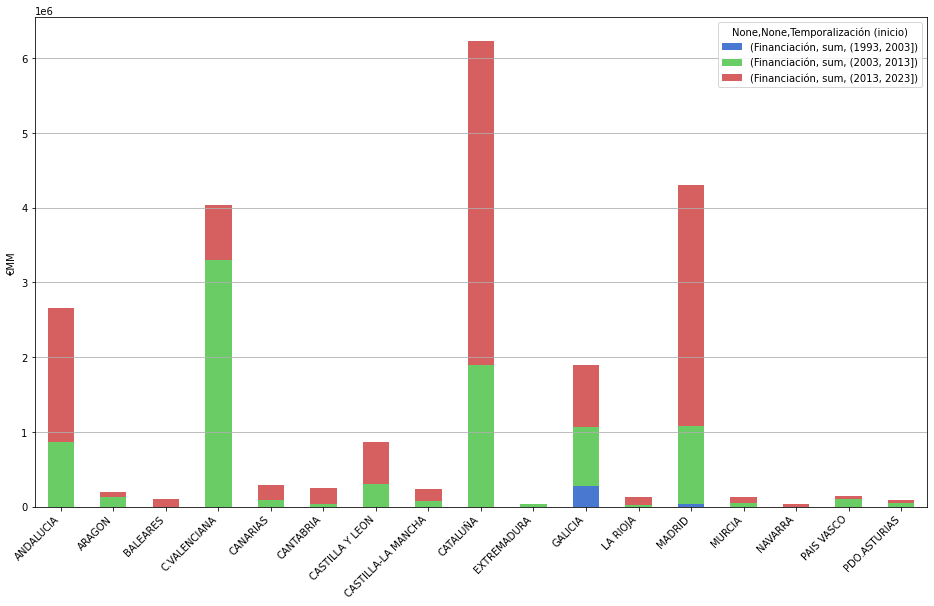

In [6]:
plt.figure()
ax1 = df2.plot(stacked=True, kind="bar", figsize=(16,9), legend=True)
ax1.set_ylabel("€MM")
ax1.set_xlabel("")
plt.grid(axis='y')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')
plt.show()
